In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import scipy as scs

In [2]:
def vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='prodromakis',fon='prodromakis',relationship='linear'):
        'Memristor model based on the VTEAM model, input paramaters are'

        def prodromakis(x,p,j):
            dum=(x-0.5)**2
            dum1=(dum+0.75)**p
            return(j*(1-dum1))

        def dw(v,koff,kon,aoff,aon,voff,von,x,p,j,dt):
            if 0<voff<v:
                dum = koff*(((v/voff)-1)**aoff)
                if foff == 'prodromakis':
                    func = prodromakis(x,p,j)
                return(dum*func*dt)

            if von<v<voff:
                return(0)

            if v<von<0:
                dum = kon*(((v/von)-1)**aon)
                if fon == 'prodromakis':
                    func = prodromakis(x,p,j)
                return(dum*func*dt)

            else: 
                return(0)

        def  linear(roff,ron,woff,won,v,w):
            dum = (roff-ron)/(woff-won)
            dum1 = ((dum * (w-won))+ron)**(-1)

            return((dum1*v))


        out=[]
        boundarypos=[]
        test = []
        if relationship == 'linear':
            rel = linear
        for k in range(len(t)):
            if k!=0:
                dt= (t[k]-t[k-1])
                change=dw(v[k],koff,kon,aoff,aon,voff,von,w,p,j,dt)
                w=w+change
                out.append(rel(roff,ron,woff,won,v[k],w))
                boundarypos.append(w)
                test.append(dw(v[k],koff,kon,aoff,aon,voff,von,w,p,j,dt))
            else:
                out.append(rel(roff,ron,woff,won,v[k],w))
                boundarypos.append(w)
                test.append(0)
        return(out,boundarypos,test)
    
def prodromakis(x,p,j):
    dum=(x-0.5)**2
    dum1=(dum+0.75)**p
    return(j*(1-dum1))

In [3]:
def SPICEfileReader (filetoread,columns):
    'reads LTSpice files, needs '' over the file name and the number of columns in the file'
    f=open(filetoread,'r')#opens the file
    dum = f.readlines()[1:]#reads the data, but skips the first line as they are column titles 
    f.close()#closes the file
    data=[]#empty array for the data later
    for i in dum: #goes through all the data
        dum1=i.split('\t')#splits the data at every column, making rows
        for j in dum1:#goes through each of these rows
            data.append(float(j.split('\n')[0]))#splits the data at the end point, and gets rid of the new row command from the data
    rows=int(len(data)/columns)#caluclates how many rows there are
    out=np.reshape(data,(rows,columns))#re-shapes the data into a useable format
    return(out)#returns the data
file_path = 'D:\\harry\\PhD Work\\Project_Michael\\Data\\HP Memristor example 1hz ron10k roff100k xinit 0.9 d27nm'
data = SPICEfileReader(file_path,3)
st = data[:,0]
sv = data[:,1]
si = data[:,2]

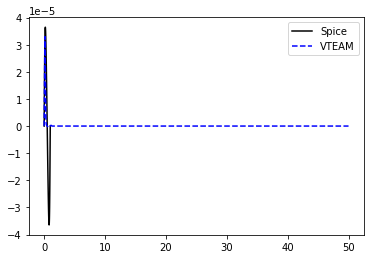

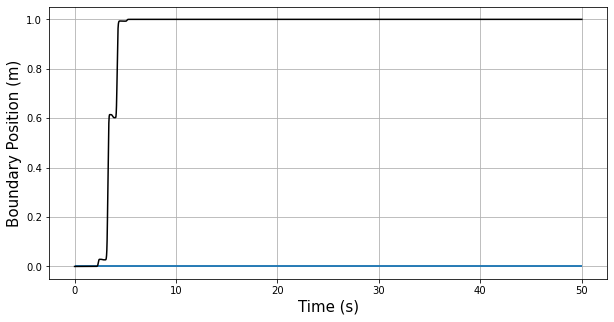

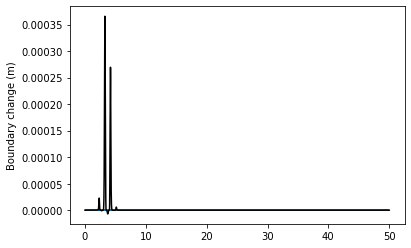

In [4]:
t = np.arange(0,50,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9#24.3e-9#2.7e-9
won = 0
woff = 27e-9
koff = 0.75e-3
kon = -0.75e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.3
roff = 100e3
ron = 10e3
p = 5
j = 10

i = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)

#plt.plot(st,sv,color='black',label='Spice')
#plt.plot(t,v,color='blue',label='VTEAM',linestyle='--')
#plt.legend()
#plt.show()

#plt.plot(sv,si,color='black',label='Spice')
#plt.plot(v,i[0],color='blue',label='VTEAM',linestyle='--')
#plt.legend()
#plt.show()

plt.plot(st,si,color='black',label='Spice')
plt.plot(t,i[0],color='blue',label='VTEAM',linestyle='--')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t,i[1],color='black')
plt.ylabel('Boundary Position (m)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.hlines(won,0,max(t))
plt.hlines(woff,0,max(t))
plt.grid()
plt.show()

plt.plot(t,i[2],color='black')
plt.ylabel('Boundary change (m)')
plt.hlines(won,0,max(t))
plt.hlines(woff,0,max(t))
plt.show()

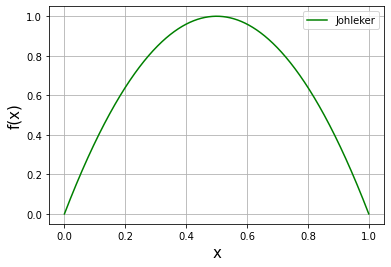

In [5]:
def johleker(x,p,d):
    return((1-(((2*x)-1)**(2*p))))

x=np.linspace(0,1,10000)
p=1
j=4
d=27e-9
pa = []
for i in range(len(x)):
    pa.append(johleker(x[i],p,d))
    
plt.plot(x,pa,color='green',label='Johleker')
plt.xlabel('x',fontsize=15)
plt.ylabel('f(x)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

In [6]:
def test_dw(k,v,v_,a,w,p):
    def johleker(x,p):
        return(1-(((2*x)-1)**(2*p)))
    dum = (v/v_)-1
    dum1 = k * (dum**a)
    return(dum1*johleker(w,p))
koff = 0.75e-3
x=np.linspace(0,1,10000)
voff = 0.1
aoff = 1
w=1e-9
p = 5
j = 10

what = []
test = []
for i in range(len(x)):
    change = test_dw(koff,x[i],voff,aoff,w,p)
    test.append(change)
    w=w+change
    what.append(w)

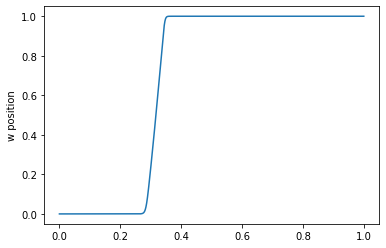

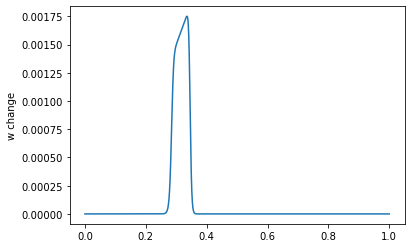

In [7]:
plt.plot(x,what)
plt.ylabel('w position')
plt.show()
plt.plot(x,test)
plt.ylabel('w change')
plt.show()

In [8]:
change

4.4964032497318837e-17

In [9]:
def vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='prodromakis',fon='prodromakis',relationship='linear'):
        'Memristor model based on the VTEAM model, input paramaters are'

        def prodromakis(x,p,j):
            dum=(x-0.5)**2
            dum1=(dum+0.75)**p
            return(j*(1-dum1))
        def why(x,d):
            return((x*(d-x))/(d**2))
        def johleker(x,p):
            return(1-(((2*x)-1)**(2*p)))

        def dw(v,koff,kon,aoff,aon,voff,von,woff,won,w,p,j,dt):
            
            x = w / (woff-won) 
            if 0<voff<v:
                dum = koff*(((v/voff)-1)**aoff)
                if foff == 'prodromakis':
                    func = prodromakis(x,p,j)
                if foff =='test':
                    func = why(w,woff)
                if foff == 'johleker':
                    func = johleker(x,p)
                return(dum*func*dt)
                   

            if von<v<voff:
                return(0)

            if v<von<0:
                dum = kon*(((v/von)-1)**aon)
                if fon == 'prodromakis':
                    func = prodromakis(x,p,j)
                if fon == 'test':
                    func = why(w,woff)
                if fon == 'johleker':
                    func = johleker(x,p)  
                    
                return(dum*func*dt)

            else: 
                return(0)

        def  linear(roff,ron,woff,won,v,w):
            dum = (roff-ron)/(woff-won)
            dum1 = ((dum * (w-won))+ron)**(-1)

            return((dum1*v))


        out=[]
        boundarypos=[]
        test = []
        if relationship == 'linear':
            rel = linear
        for k in range(len(t)):
            if k!=0:
                dt= (t[k]-t[k-1])
                change=dw(v[k],koff,kon,aoff,aon,voff,von,woff,won,w,p,j,dt)
                w=w+change
                out.append(rel(roff,ron,woff,won,v[k],w))
                boundarypos.append(w)
                test.append(dw(v[k],koff,kon,aoff,aon,voff,von,woff,won,w,p,j,dt))
            else:
                out.append(rel(roff,ron,woff,won,v[k],w))
                boundarypos.append(w)
                test.append(0)
        return(out,boundarypos,test)

In [10]:
t = np.arange(0,3,0.000001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9#24.3e-9#2.7e-9
won = 0
woff = 27e-9
koff = 0.75e-10
kon = -0.75e-10
aoff = 3
aon = 3
voff = 0.05
von = -0.05
roff = 100e3
ron = 10e3
p = 2
j = 1

i_pro = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,(p*2),j)#,'test','test')
i_test = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,'test','test')
i_jok = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,'johleker','johleker')

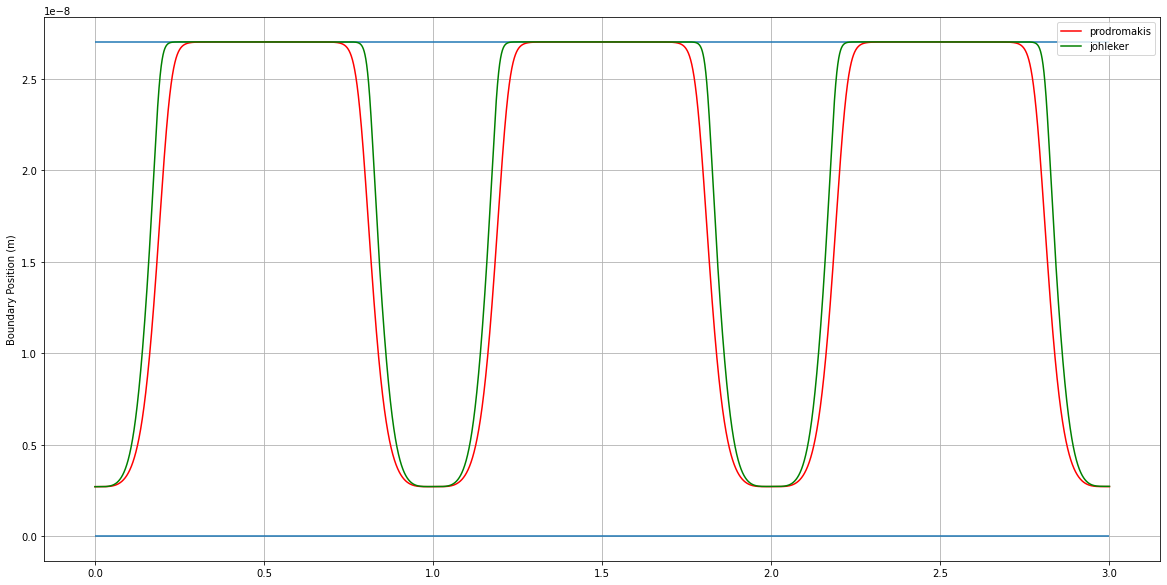

C:\Users\harry\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


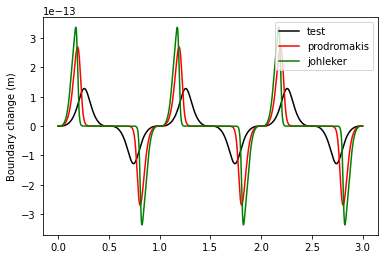

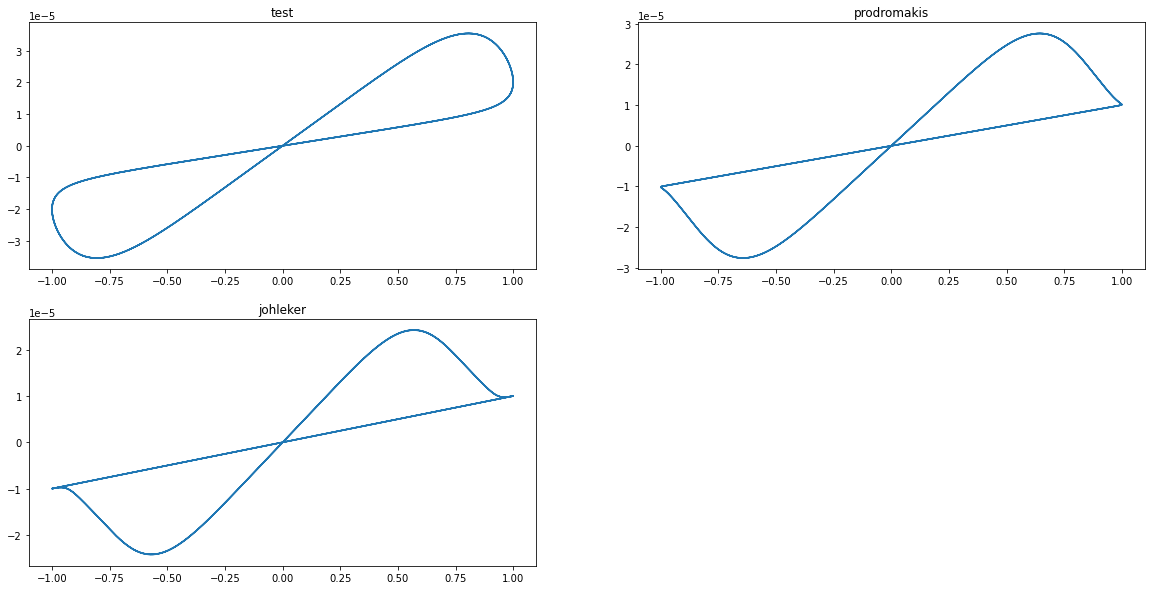

In [11]:
plt.figure(figsize=(20,10))
#plt.plot(t,i_test[1],color='black',label='test')
plt.plot(t,i_pro[1],color='red',label='prodromakis')
plt.plot(t,i_jok[1],color='green',label='johleker')
plt.ylabel('Boundary Position (m)')
plt.hlines(won,0,max(t))
plt.hlines(woff,0,max(t))
#plt.ylim(-2e-9,28e-9)
#plt.xlim(20,30)
plt.grid()
plt.legend()
plt.show()

plt.plot(t,i_test[2],color='black',label='test')
plt.plot(t,i_pro[2],color='red',label='prodromakis')
plt.plot(t,i_jok[2],color='green',label='johleker')
plt.ylabel('Boundary change (m)')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('test')
plt.plot(v,i_test[0])
plt.subplot(2,2,2)
plt.title('prodromakis')
plt.plot(v,i_pro[0])
plt.subplot(2,2,3)
plt.title('johleker')
plt.plot(v,i_jok[0])
plt.show()

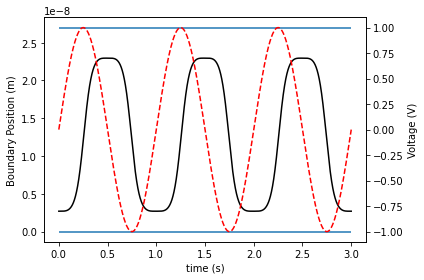

In [12]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Boundary Position (m)')
ax1.plot(t, i_test[1], color='black')
ax1.hlines(won,0,max(t),label='$w_{on}$')
ax1.hlines(woff,0,max(t),label='$w_{off}$')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Voltage (V)' )  
ax2.plot(t, v,linestyle='--',color='red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [13]:
max(i_test[1])

2.2957616596935454e-08

In [14]:
def SPICEfileReader (filetoread,columns):
    'reads LTSpice files, needs '' over the file name and the number of columns in the file'
    f=open(filetoread,'r')#opens the file
    dum = f.readlines()[1:]#reads the data, but skips the first line as they are column titles 
    f.close()#closes the file
    data=[]#empty array for the data later
    for i in dum: #goes through all the data
        dum1=i.split('\t')#splits the data at every column, making rows
        for j in dum1:#goes through each of these rows
            data.append(float(j.split('\n')[0]))#splits the data at the end point, and gets rid of the new row command from the data
    rows=int(len(data)/columns)#caluclates how many rows there are
    out=np.reshape(data,(rows,columns))#re-shapes the data into a useable format
    return(out)#returns the data
file_path = 'D:\\harry\\PhD Work\\Project_Michael\\RC Parallel runs for comparison in python\\Optimizing model'
data = SPICEfileReader(file_path,3)
st = data[:,0]
sv = data[:,1]
si = data[:,2]

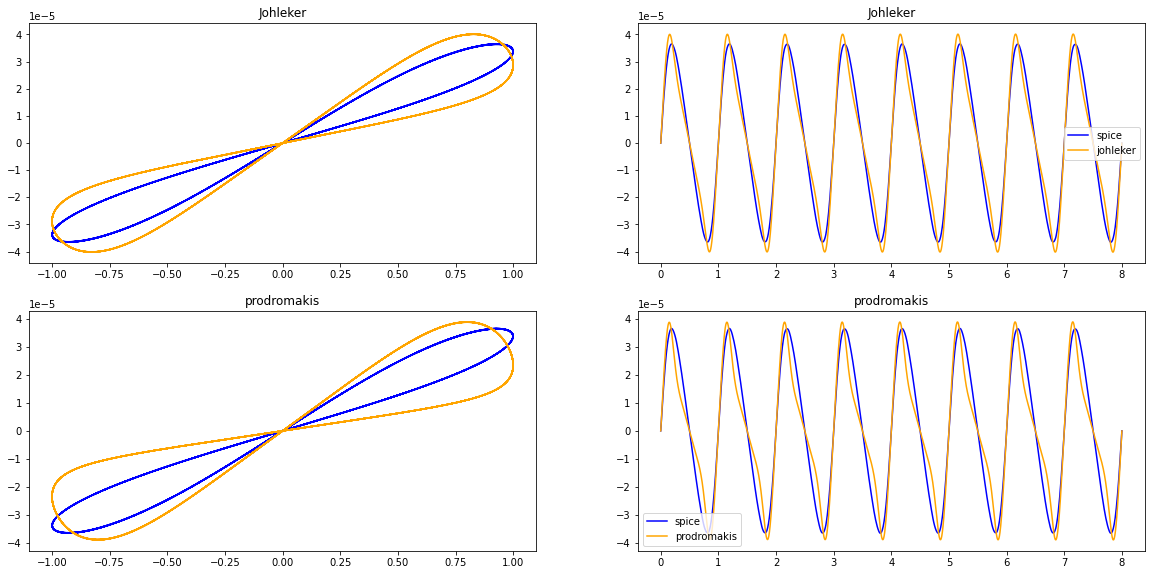

In [15]:
t = np.arange(0,8,0.0001)
f = 1
vamp = 1
v = vamp * np.sin(2*math.pi*f*t)

aoff = 2
aon =  2
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
koff = 0.75e-9#1e-3
kon = -0.75e-9#-1e-3
woff = 27e-9
won = 0
w = 2e-9#24.3e-9

p = 2
j = 4 #10

i_pro = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)
i_test = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,'test','test')
i_jok = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,'johleker','johleker')

plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('Johleker')
plt.plot(sv,si,label='spice',color='blue')
plt.plot(v,i_jok[0],label='johleker',color='orange')

plt.subplot(3,2,2)
plt.title('Johleker')
plt.plot(st,si,label='spice',color='blue')
plt.plot(t,i_jok[0],label='johleker',color='orange')
plt.legend()

plt.subplot(3,2,3)
plt.title('prodromakis')
plt.plot(sv,si,label='spice',color='blue')
plt.plot(v,i_pro[0],label='prodromakis',color='orange')

plt.subplot(3,2,4)
plt.title('prodromakis')
plt.plot(st,si,label='spice',color='blue')
plt.plot(t,i_pro[0],label='prodromakis',color='orange')
plt.legend()

plt.show()

In [16]:
def vteam_optim_pro(v,w,koff,kon):
    'Memristor model based on the VTEAM model, input paramaters are'

    voff = 0.1
    von = -0.1
    roff = 100e3
    ron = 10e3
    woff = 27e-9
    won = 0
    p = 2
    j = 4
    aon = 1
    aoff = 1
    dt=0.0001
    def prodromakis(x,p,j):
        dum=(x-0.5)**2
        dum1=(dum+0.75)**p
        return(j*(1-dum1))

    def dw(v,koff,kon,aoff,aon,voff,von,woff,won,w,p,j,dt):
        x = w / (woff-won) 
        if 0<voff<v:
            dum = koff*(((v/voff)-1)**aoff)
            func = prodromakis(x,p,j)
            return(dum*func*dt)


        if von<v<voff:
            return(0)

        if v<von<0:
            dum = kon*(((v/von)-1)**aon)
            func = prodromakis(x,p,j)
            return(dum*func*dt)

        else: 
            return(0)

    def  linear(roff,ron,woff,won,v,w):
        dum = (roff-ron)/(woff-won)
        dum1 = ((dum * (w-won))+ron)**(-1)
        return((dum1*v))


    out=[]
    boundarypos=[]
    test = []
    rel = linear
    for k in range(len(v)):
        if k!=0:
            change=dw(v[k],koff,kon,aoff,aon,voff,von,woff,won,w,p,j,dt)
            w=w+change
            out.append(rel(roff,ron,woff,won,v[k],w))
        else:
            out.append(rel(roff,ron,woff,won,v[k],w))
    return(out)

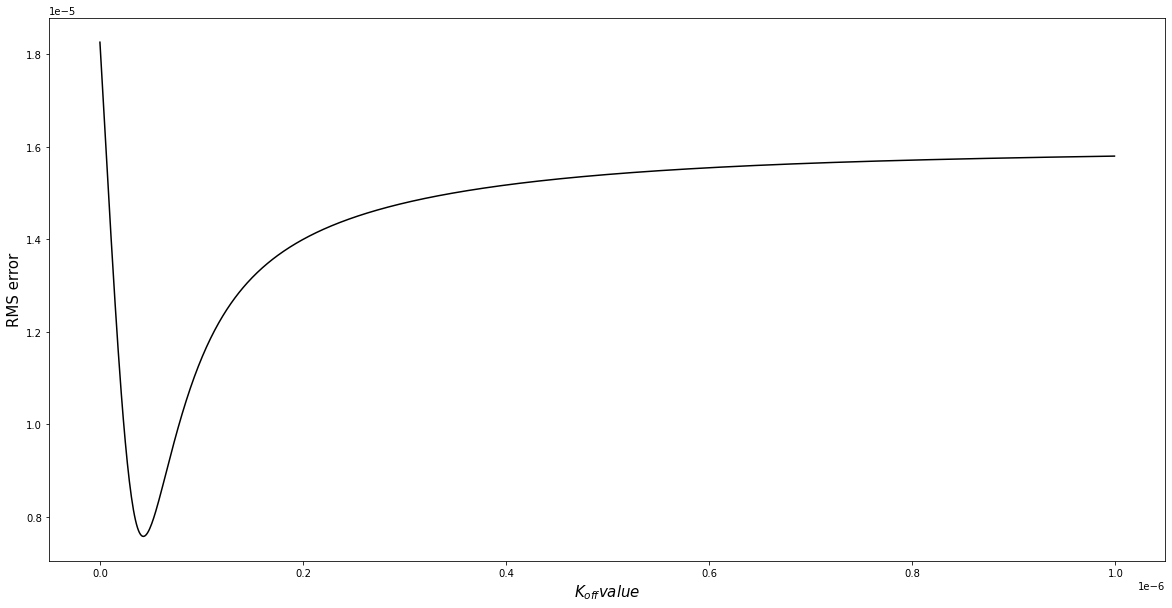

The minimum error was at Koff = 4.3e-08


In [17]:
t = np.arange(0,8,0.0001)
f = 1
vamp = 1
v = vamp * np.sin(2*math.pi*f*t)

koff = 0.75e-8
kon = -0.75e-8
w = 2e-9

koff=np.arange(0,1e-6,1e-9)
error = []
for i in range(len(koff)):
    test = vteam_optim_pro(sv,w,koff[i],kon)
    dum=[]
    for j in range(len(test)):
        dum.append((si[j]-test[j])**2)
    error.append(np.sqrt((1/len(test))*sum(dum)))

plt.figure(figsize=(20,10))
plt.plot(koff,error,color='black')
plt.xlabel('$K_{off} value$',fontsize=15)
plt.ylabel('RMS error',fontsize=15)
plt.show()

minerror = min(error)
for i in range(len(error)):
    if error[i] == minerror:
        print('The minimum error was at Koff = ' + str(koff[i]))

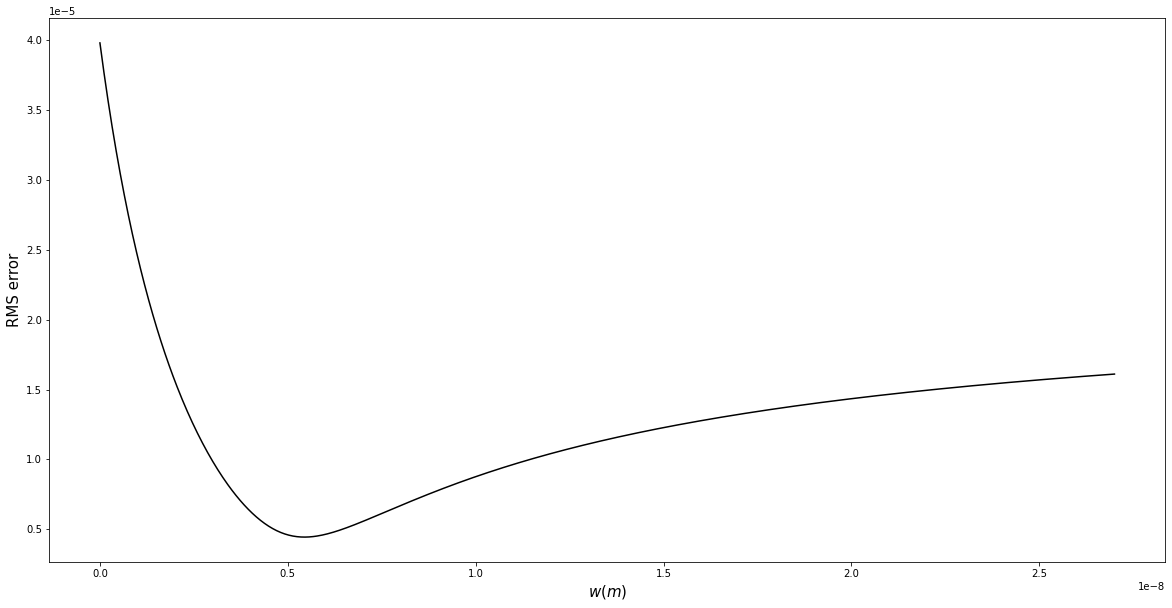

The minimum error was at w = 5.4324324324324324e-09


In [18]:
koff = 3.3e-9
kon = -3.3e-9
w = np.linspace(0,27e-9,1000)

error = []
for i in range(len(w)):
    test = vteam_optim_pro(sv,w[i],koff,kon)
    dum=[]
    for j in range(len(test)):
        dum.append((si[j]-test[j])**2)
    error.append(np.sqrt((1/len(test))*sum(dum)))

plt.figure(figsize=(20,10))
plt.plot(w,error,color='black')
plt.xlabel('$w (m)$',fontsize=15)
plt.ylabel('RMS error',fontsize=15)
plt.show()

minerror = min(error)
for i in range(len(error)):
    if error[i] == minerror:
        print('The minimum error was at w = ' + str(w[i]))


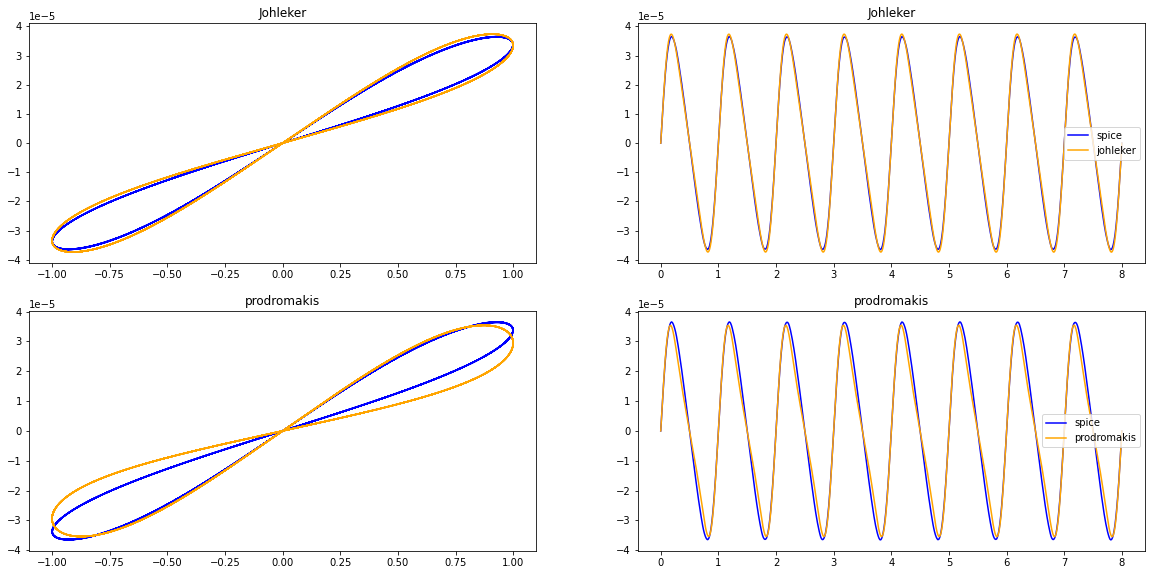

In [19]:
t = np.arange(0,8,0.0001)
f = 1
vamp = 1
v = vamp * np.sin(2*math.pi*f*t)
aoff = 1
aon =  1
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
koff = 3.3003300330033003e-09#4.3e-10
kon = -3.3003300330033003e-09#-4.3e-10
woff = 27e-9
won = 0
w = 2.6e-09

p = 2
j = 4 

i_pro = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)
i_test = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,'test','test')
i_jok = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,'johleker','johleker')

plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('Johleker')
plt.plot(sv,si,label='spice',color='blue')
plt.plot(v,i_jok[0],label='johleker',color='orange')

plt.subplot(3,2,2)
plt.title('Johleker')
plt.plot(st,si,label='spice',color='blue')
plt.plot(t,i_jok[0],label='johleker',color='orange')
plt.legend()

plt.subplot(3,2,3)
plt.title('prodromakis')
plt.plot(sv,si,label='spice',color='blue')
plt.plot(v,i_pro[0],label='prodromakis',color='orange')

plt.subplot(3,2,4)
plt.title('prodromakis')
plt.plot(st,si,label='spice',color='blue')
plt.plot(t,i_pro[0],label='prodromakis',color='orange')
plt.legend()

plt.show()

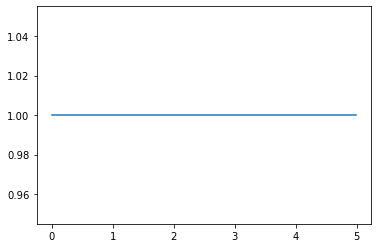

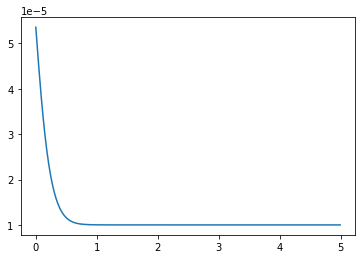

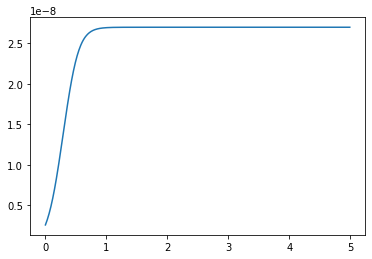

In [20]:
t = np.arange(0,5,0.01)
f = 1
vamp = 1
v = np.ones_like(t)


aoff = 1
aon =  1
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
koff = 3.3003300330033003e-09#4.3e-10
kon = -3.3003300330033003e-09#-4.3e-10
woff = 27e-9
won = 0
w = 2.6e-09

p = 2
j = 4 
i = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)

plt.plot(t,v)
plt.show()
plt.plot(t,i[0])
plt.show()
plt.plot(t,i[1])
plt.show()

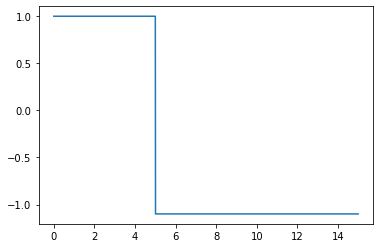

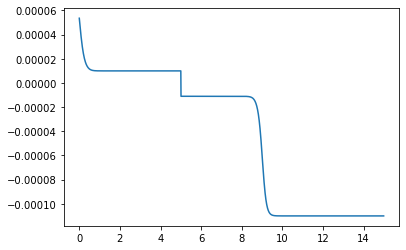

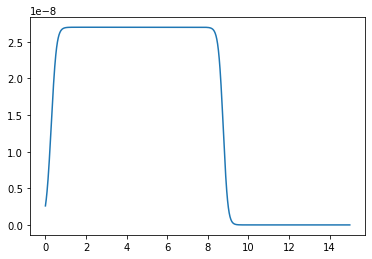

In [21]:
t = np.arange(0,15,0.01)
f = 1
vamp = 1
v = []
for i in range(len(t)):
    if t[i] <=5:
        v.append(1)
    else:
        v.append(-1.1)

aoff = 1
aon =  1
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
koff = 3.3003300330033003e-09#4.3e-10
kon = -3.3003300330033003e-09#-4.3e-10
woff = 27e-9
won = 0
w = 2.6e-09

p = 2
j = 4 
i = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)

plt.plot(t,v)
plt.show()
plt.plot(t,i[0])
plt.show()
plt.plot(t,i[1])
plt.show()